In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import math
import pandas as pd  
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [41]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
pd.set_option('display.max_columns', None)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [42]:
# Rename the columns so they follow the PE8 (snake case).
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [67]:
customer_df['Effective_To_Date'] = pd.to_datetime(customer_df['Effective_To_Date'])
customer_df.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Month,Day
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,31
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,20
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3


In [68]:
# Check NaN values per column.
customer_df.isnull().sum()/len(customer_df) # got surprised there were no null values in the data

Customer                         0.0
State                            0.0
Customer_Lifetime_Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective_To_Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location_Code                    0.0
Marital_Status                   0.0
Monthly_Premium_Auto             0.0
Months_Since_Last_Claim          0.0
Months_Since_Policy_Inception    0.0
Number_of_Open_Complaints        0.0
Number_of_Policies               0.0
Policy_Type                      0.0
Policy                           0.0
Renew_Offer_Type                 0.0
Sales_Channel                    0.0
Total_Claim_Amount               0.0
Vehicle_Class                    0.0
Vehicle_Size                     0.0
Month                            0.0
Day                              0.0
dtype: float64

In [71]:
# Define a function that differentiates between continuous and discrete variables.
def define_variable(df, unique_value_max=10):
    categorical = []
    num_continuous = []
    num_descrete = []
    for i in df.columns:
        if df[i].dtype == object:
            #print(i + " categorical")
            categorical.append(i)
        else:
            if df[i].nunique() > unique_value_max:
                #print(i + " numerical - continuous")
                num_continuous.append(i)
            else:
                #print(i + " numerical - descrete")
                num_descrete.append(i)
             
      
    return df[categorical], df[num_continuous], df[num_descrete]
cat_features, num_continuous_features, num_descrete_features = define_variable(customer_df)
cat_features2, num_continuous_features2, num_descrete_features2 = define_variable(cat_features) # check if this breaks function...
display(cat_features.head())
display(num_continuous_features)
display(num_descrete_features)

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


,Customer_Lifetime_Value,Effective_To_Date,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount,Day
0,2763.519279,2011-02-24,56274,69,32,5,384.811147,24
1,6979.535903,2011-01-31,0,94,13,42,1131.464935,31
2,12887.431650,2011-02-19,48767,108,18,38,566.472247,19
3,7645.861827,2011-01-20,0,106,18,65,529.881344,20
4,2813.692575,2011-02-03,43836,73,12,44,138.130879,3
...,...,...,...,...,...,...,...,...
9129,23405.987980,2011-02-10,71941,73,18,89,198.234764,10
9130,3096.511217,2011-02-12,21604,79,14,28,379.200000,12
9131,8163.890428,2011-02-06,0,85,9,37,790.784983,6
9132,7524.442436,2011-02-03,21941,96,34,3,691.200000,3


,Number_of_Open_Complaints,Number_of_Policies,Month
0,0,1,2
1,0,8,1
2,0,2,2
3,0,7,1
4,0,1,2
...,...,...,...
9129,0,2,2
9130,0,1,2
9131,3,2,2
9132,0,3,2


In [72]:
# For the categorical data, check if there is some kind of text in a variable so we would need to clean it.
for c in cat_features.columns[1:]:
    print(c + " - " + str (cat_features[c].nunique()))
    display(cat_features[c].value_counts(dropna=False))
    print()


State - 5


California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64


Response - 2


No     7826
Yes    1308
Name: Response, dtype: int64


Coverage - 3


Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64


Education - 5


Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64


EmploymentStatus - 5


Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64


Gender - 2


F    4658
M    4476
Name: Gender, dtype: int64


Location_Code - 3


Suburban    5779
Rural       1773
Urban       1582
Name: Location_Code, dtype: int64


Marital_Status - 3


Married     5298
Single      2467
Divorced    1369
Name: Marital_Status, dtype: int64


Policy_Type - 3


Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy_Type, dtype: int64


Policy - 9


Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64


Renew_Offer_Type - 4


Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew_Offer_Type, dtype: int64


Sales_Channel - 4


Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales_Channel, dtype: int64


Vehicle_Class - 6


Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle_Class, dtype: int64


Vehicle_Size - 3


Medsize    6424
Small      1764
Large       946
Name: Vehicle_Size, dtype: int64

In [73]:
categorical = cat_features
discrete_df = num_descrete_features
continuous_df = num_continuous_features

In [74]:
categorical.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


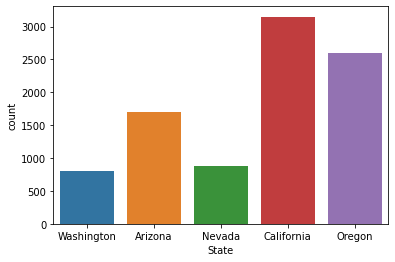

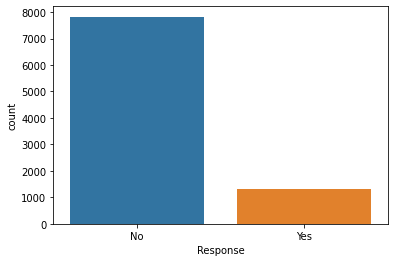

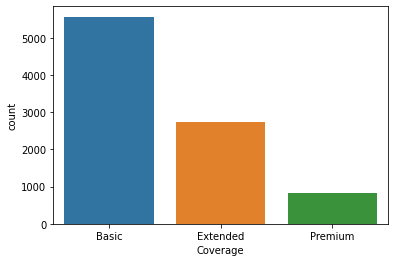

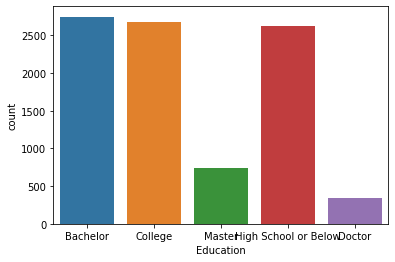

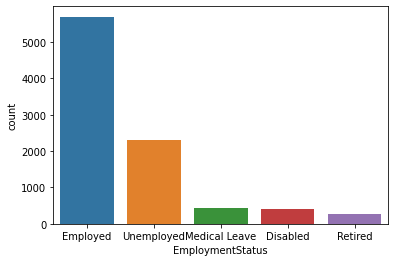

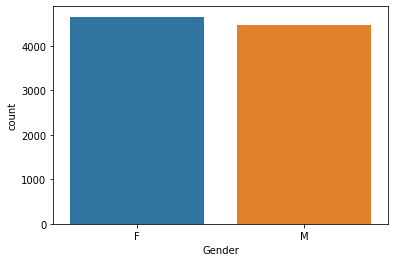

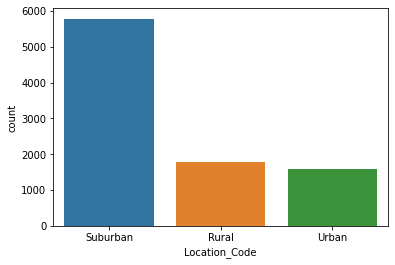

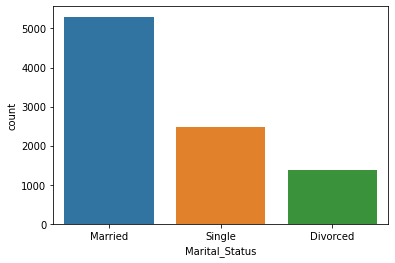

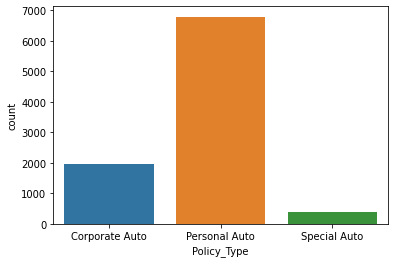

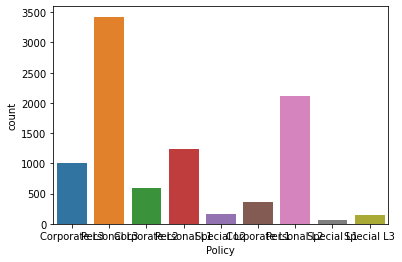

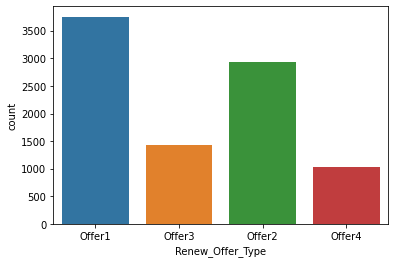

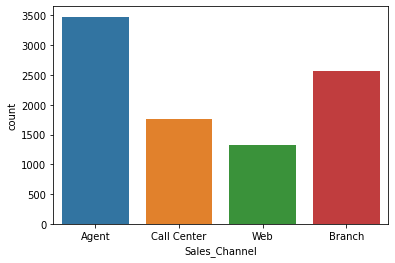

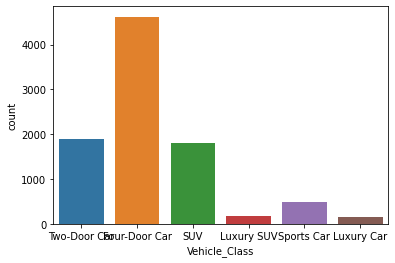

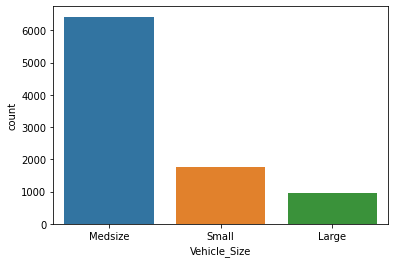

In [75]:
for column in categorical.columns[1:]:
    sns.countplot(x=categorical[column])
    plt.show()

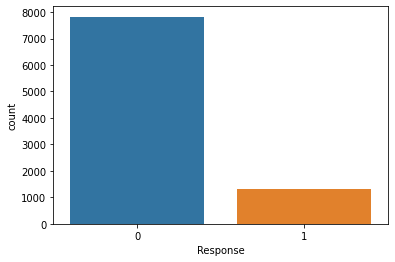

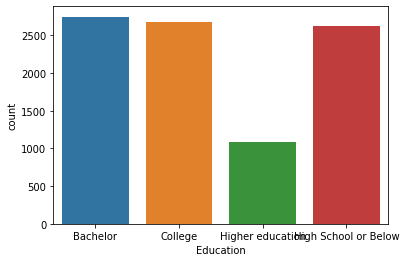

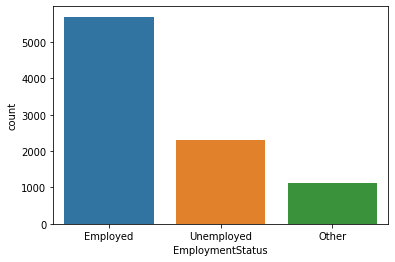

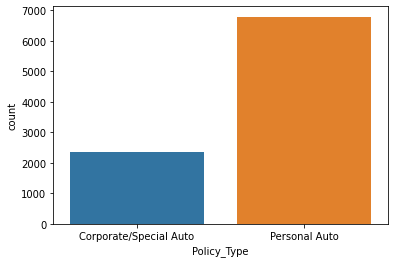

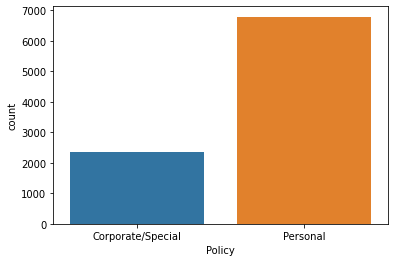

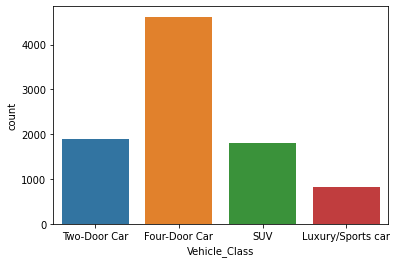

In [76]:
def clean(x):
    if x in ['No']:
        return 0
    elif x in ['Yes']:
        return 1
    elif x in ['Master', 'Doctor']:
        return 'Higher education'
    elif x in ['Medical Leave', 'Retired', 'Disabled']:
        return 'Other'
    elif x in ['Special Auto','Corporate Auto']:
        return 'Corporate/Special Auto'
    elif x in ['Corporate L1', 'Corporate L2', 'Corporate L3']:
        return 'Corporate/Special'
    elif x in ['Personal L1', 'Personal L2', 'Personal L3']:
        return 'Personal'
    elif x in ['Special L1', 'Special L2', 'Special L3']:
        return 'Corporate/Special'
    elif x in ['Luxury Car', 'Sports Car', 'Luxury SUV']:
        return 'Luxury/Sports car'
    else:
        return x
    
customer_df['Response'] = list(map(clean, customer_df['Response']))
customer_df['Education'] = list(map(clean, customer_df['Education']))
customer_df['EmploymentStatus'] = list(map(clean, customer_df['EmploymentStatus']))
customer_df['Policy_Type'] = list(map(clean, customer_df['Policy_Type']))
customer_df['Policy'] = list(map(clean, customer_df['Policy']))
customer_df['Vehicle_Class'] = list(map(clean, customer_df['Vehicle_Class']))

column_list=['Response','Education','EmploymentStatus','Policy_Type','Policy','Vehicle_Class']
for column in column_list:
    sns.countplot(x=customer_df[column])
    plt.show()

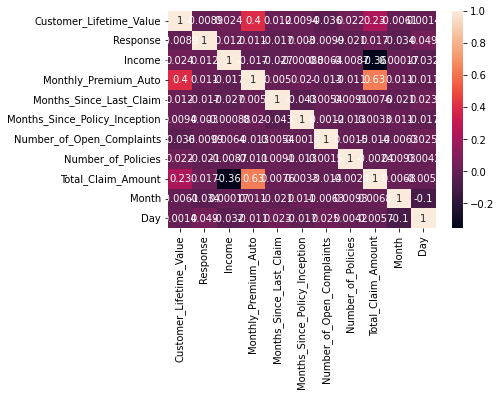

<Figure size 3600x3600 with 0 Axes>

In [78]:
# Plot a correlation matrix
correlations_matrix = customer_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.figure(figsize=(6, 6), 
           dpi = 600) 
plt.show() 

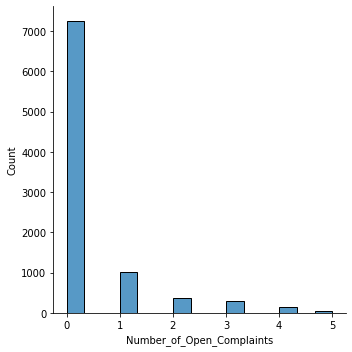

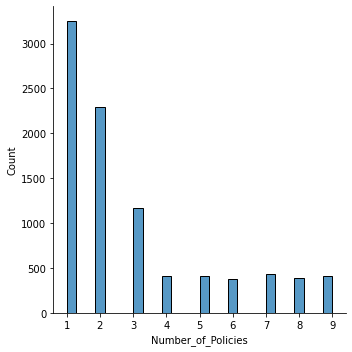

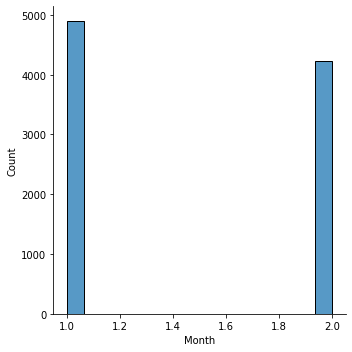

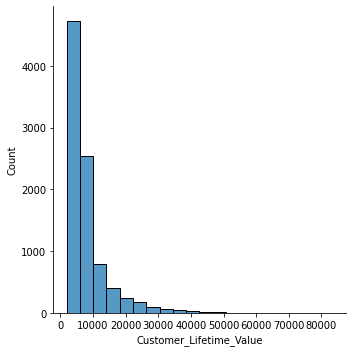

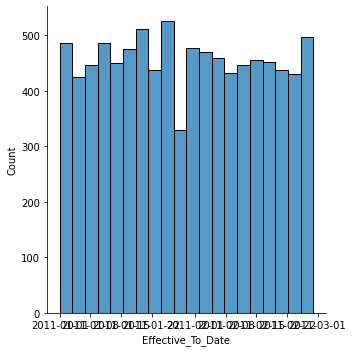

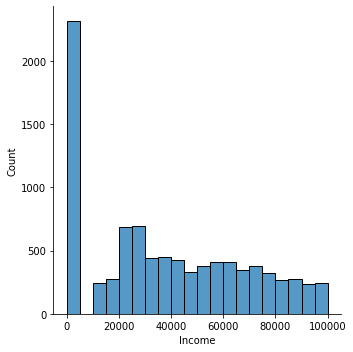

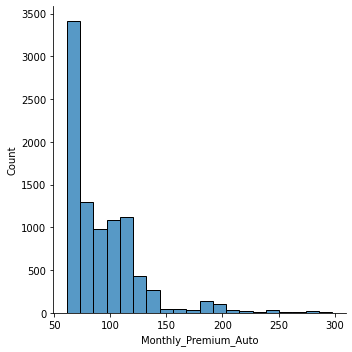

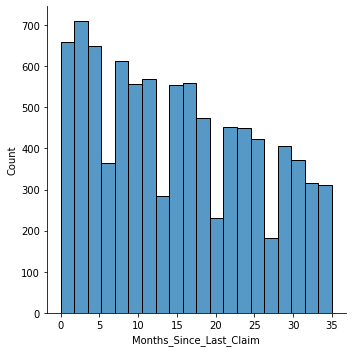

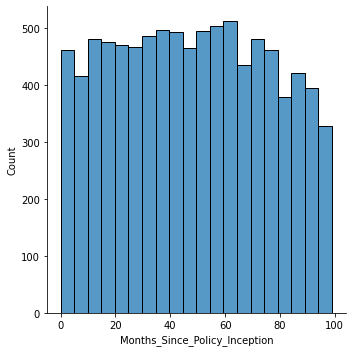

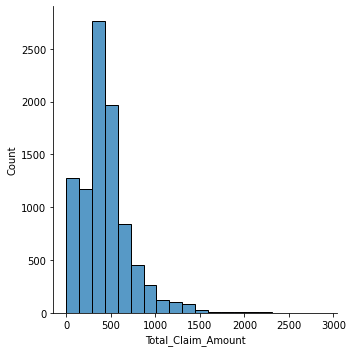

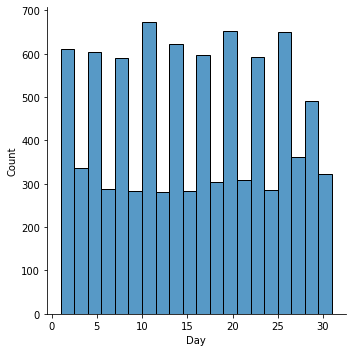

In [79]:
# Create a function to plot every discrete variables. Do the same with continuous variables
def discrete():
    for column in discrete_df.columns:
        sns.displot(discrete_df[column])
        plt.show()
discrete()

def continuous():
    for column in continuous_df.columns:
        sns.displot(continuous_df[column], bins = 20)
        plt.show()
continuous()

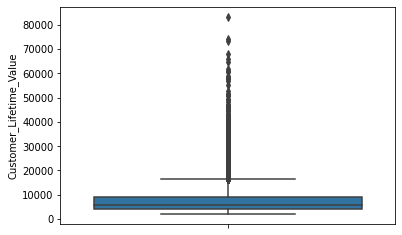

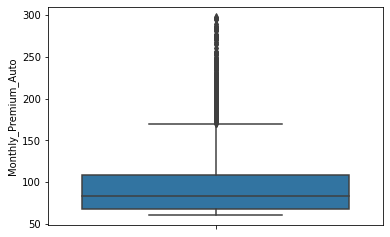

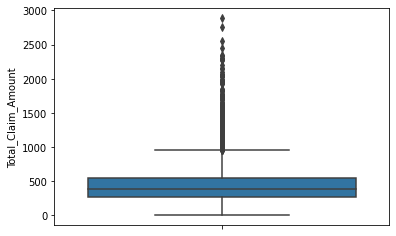

In [80]:
# Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

sns.boxplot(y=customer_df['Customer_Lifetime_Value'])
plt.show()
sns.boxplot(y=customer_df['Monthly_Premium_Auto'])
plt.show()
sns.boxplot(y=customer_df['Total_Claim_Amount'])
plt.show()

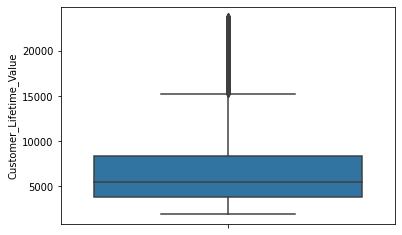

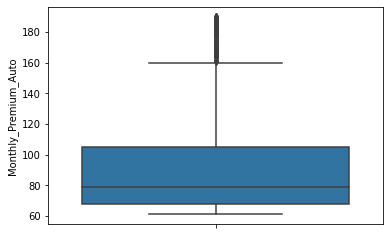

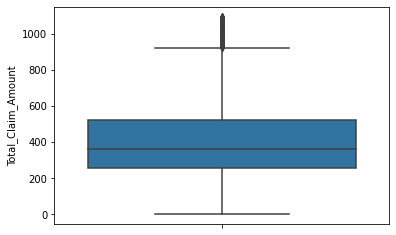

In [81]:
#7 Have you found outliers? If you have, what should we do with them?

iqr_customer_lifetime_value = np.percentile(customer_df['Customer_Lifetime_Value'],75) - np.percentile(customer_df['Customer_Lifetime_Value'],25)
upper_limit_customer_lifetime_value = np.percentile(customer_df['Customer_Lifetime_Value'],75) + 3*iqr_customer_lifetime_value
extra1 = customer_df[customer_df['Customer_Lifetime_Value'] > upper_limit_customer_lifetime_value] # 2*iqr was removing a bit too much - 7%)

iqr_monthly_premium_auto = np.percentile(customer_df['Monthly_Premium_Auto'],75) - np.percentile(customer_df['Monthly_Premium_Auto'],25)
upper_limit_monthly_premium_auto = np.percentile(customer_df['Monthly_Premium_Auto'],75) + 2*iqr_monthly_premium_auto
extra2 = customer_df[customer_df['Monthly_Premium_Auto'] > upper_limit_monthly_premium_auto]

iqr_total_claim_amount = np.percentile(customer_df['Total_Claim_Amount'],75) - np.percentile(customer_df['Total_Claim_Amount'],25)
upper_limit_total_claim_amount= np.percentile(customer_df['Total_Claim_Amount'],75) + 2*iqr_total_claim_amount
extra3 = customer_df[customer_df['Total_Claim_Amount'] > upper_limit_total_claim_amount]

# print(len(extra1),'elements to be removed from Customer_Lifetime_Value,', round(100*len(extra1)/len(continuous_df),1),'%')
# print(len(extra2),'elements to be removed from Monthly_Premium_Auto,', round(100*len(extra2)/len(continuous_df),1),'%')
# print(len(extra3),'elements to be removed from Total_Claim_Amount,', round(100*len(extra3)/len(continuous_df),1),'%')

customer_df = customer_df[customer_df['Customer_Lifetime_Value'] < upper_limit_customer_lifetime_value]
customer_df= customer_df[customer_df['Monthly_Premium_Auto'] < upper_limit_monthly_premium_auto]
customer_df = customer_df[customer_df['Total_Claim_Amount'] < upper_limit_total_claim_amount]

sns.boxplot(y=customer_df['Customer_Lifetime_Value'])
plt.show()
sns.boxplot(y=customer_df['Monthly_Premium_Auto'])
plt.show()
sns.boxplot(y=customer_df['Total_Claim_Amount'])
plt.show()


In [84]:
# Get categorical features.
categorical.head()

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [85]:
date_time = pd.DataFrame()
date_time['day'] = customer_df['Effective_To_Date'].dt.day
date_time['week'] = customer_df['Effective_To_Date'].dt.week
date_time['month'] = customer_df['Effective_To_Date'].dt.month
date_time['target'] = customer_df['Total_Claim_Amount']

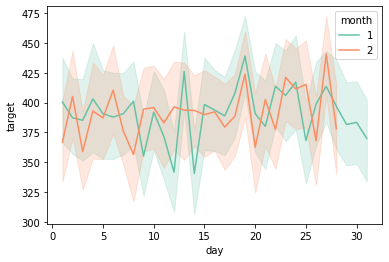

In [86]:
sns.lineplot(x=date_time.day, y=date_time.target, hue = date_time.month, palette='Set2');

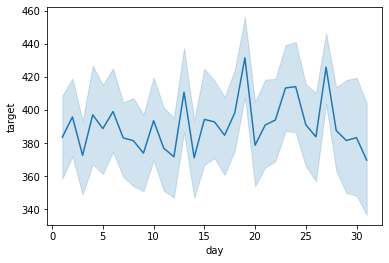

In [87]:
sns.lineplot(x=date_time.day, y=date_time.target);

In [88]:
data = customer_df
data

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Month,Day
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate/Special Auto,Corporate/Special,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19
3,WW63253,California,7645.861827,0,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate/Special Auto,Corporate/Special,Offer1,Call Center,529.881344,SUV,Medsize,1,20
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3
5,OC83172,Oregon,8256.297800,1,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal,Offer2,Web,159.383042,Two-Door Car,Medsize,1,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,0,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal,Offer2,Web,198.234764,Four-Door Car,Medsize,2,10
9130,PK87824,California,3096.511217,1,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate/Special Auto,Corporate/Special,Offer1,Branch,379.200000,Four-Door Car,Medsize,2,12
9131,TD14365,California,8163.890428,0,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate/Special Auto,Corporate/Special,Offer1,Branch,790.784983,Four-Door Car,Medsize,2,6
9132,UP19263,California,7524.442436,0,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal,Offer3,Branch,691.200000,Four-Door Car,Large,2,3


In [89]:
data['month'] = data['Effective_To_Date'].dt.month
data['day'] = data['Effective_To_Date'].dt.day
data = data.drop(['Effective_To_Date'], axis = 1)


In [92]:
data

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Month,Day,month,day
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate/Special Auto,Corporate/Special,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24,2,24
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19,2,19
3,WW63253,California,7645.861827,0,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate/Special Auto,Corporate/Special,Offer1,Call Center,529.881344,SUV,Medsize,1,20,1,20
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3,2,3
5,OC83172,Oregon,8256.297800,1,Basic,Bachelor,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal,Offer2,Web,159.383042,Two-Door Car,Medsize,1,25,1,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,0,Basic,Bachelor,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal,Offer2,Web,198.234764,Four-Door Car,Medsize,2,10,2,10
9130,PK87824,California,3096.511217,1,Extended,College,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate/Special Auto,Corporate/Special,Offer1,Branch,379.200000,Four-Door Car,Medsize,2,12,2,12
9131,TD14365,California,8163.890428,0,Extended,Bachelor,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate/Special Auto,Corporate/Special,Offer1,Branch,790.784983,Four-Door Car,Medsize,2,6,2,6
9132,UP19263,California,7524.442436,0,Extended,College,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal,Offer3,Branch,691.200000,Four-Door Car,Large,2,3,2,3


In [94]:
# splitting 
y = data['Total_Claim_Amount']
N = data.drop(['Total_Claim_Amount'],axis = 1)
X_disc = data[['Number_of_Open_Complaints','Number_of_Policies']]
X_cat = data.select_dtypes(include = np.object)
X_cat = X_cat.drop(['Customer'],axis = 1)
X_cont = data.select_dtypes(include = np.number)
X_cont = X_cont.drop(['Number_of_Open_Complaints','Number_of_Policies'],axis = 1)


In [95]:
N.shape

(8390, 26)

In [96]:
y.shape

(8390,)

In [97]:
X_disc.shape

(8390, 2)

In [98]:
X_cat.shape

(8390, 13)

In [99]:
X_cont.shape

(8390, 11)

In [100]:
# Normalize the continuous variables. You can use any one method you want.
# using MinMaxscaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_cont)
X_cont_scaled = scaler.transform(X_cont)
X_cont_scaled = pd.DataFrame(X_cont_scaled, columns=X_cont.columns)
X_cont_scaled

,Customer_Lifetime_Value,Response,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount,Month,Day,month,day
0,0.039493,0.0,0.562847,0.062016,0.914286,0.050505,0.351782,1.0,0.766667,1.0,0.766667
1,0.501445,0.0,0.487763,0.364341,0.514286,0.383838,0.517893,1.0,0.600000,1.0,0.600000
2,0.262273,0.0,0.000000,0.348837,0.514286,0.656566,0.484434,0.0,0.633333,0.0,0.633333
3,0.041782,0.0,0.438443,0.093023,0.342857,0.444444,0.126217,1.0,0.066667,1.0,0.066667
4,0.290127,1.0,0.629140,0.062016,0.400000,0.949495,0.145650,0.0,0.800000,0.0,0.800000
...,...,...,...,...,...,...,...,...,...,...,...
8385,0.981404,0.0,0.719547,0.093023,0.514286,0.898990,0.181176,1.0,0.300000,1.0,0.300000
8386,0.054687,1.0,0.216081,0.139535,0.400000,0.282828,0.346651,1.0,0.366667,1.0,0.366667
8387,0.285911,0.0,0.000000,0.186047,0.257143,0.373737,0.723006,1.0,0.166667,1.0,0.166667
8388,0.256733,0.0,0.219452,0.271318,0.971429,0.030303,0.631945,1.0,0.066667,1.0,0.066667


In [101]:
# Find out if there is a relationship betweenbthe following categorical columns using Chi-Squared: 
# education - vehicle_size location_code - coverage
# Comment on what the presence (or not) of this relationship means for your dataset and if there are any steps you should take.


import scipy.stats as st

# Education vs Vehicle Size

data_crosstab_EV = pd.crosstab(X_cat['Education'], X_cat['Vehicle_Size'], margins = False)
st.chi2_contingency(data_crosstab_EV)

# p is high
# education and vehicle size is not related with one another

(9.441200702536333,
 0.15024316883828984,
 6,
 array([[ 263.81859356, 1775.81764005,  481.36376639],
        [ 260.99308701, 1756.79856973,  476.20834327],
        [ 248.53992849, 1672.97377831,  453.48629321],
        [ 104.64839094,  704.41001192,  190.94159714]]))

In [102]:
# Location code vs Coverage

data_crosstab_LC = pd.crosstab(X_cat['Location_Code'], X_cat['Coverage'], margins = False)
st.chi2_contingency(data_crosstab_LC)

# p is low
# location_code and coverage are related with one another

(12.008516801288518,
 0.017288044364042358,
 4,
 array([[1056.03384982,  498.66030989,  132.30584029],
        [3265.12896305, 1541.79737783,  409.07365912],
        [ 930.83718713,  439.54231228,  116.6205006 ]]))

In [103]:
# Encode the categorical variables

# Ordinal columns
# coverage, employmentstatus, location_code, vehicle_size

X_cat['Coverage'] = X_cat['Coverage'].map({'Basic' : 0, 'Extended' : 1, 'Premium' : 2})
X_cat['EmploymentStatus'] = X_cat['EmploymentStatus'].map({'Other' : 0, 'Unemployed' : 1, 'Employed' : 2})
X_cat['Location_Code'] = X_cat['Location_Code'].map({'Rural' : 0, 'Suburban' : 1, 'Urban' : 2})
X_cat['Vehicle_Size'] = X_cat['Vehicle_Size'].map({'Small' : 0, 'Medsize' : 1, 'Large' : 2})

from sklearn.preprocessing import OneHotEncoder

X_onehotencoder = X_cat.drop(['Coverage', 'EmploymentStatus', 'Location_Code', 'Vehicle_Size'], axis = 1)


X_one_hot_encoded = pd.get_dummies(X_onehotencoder, drop_first=True)

# Concatting the categorical data back from onehot/ordinal encoding
X_cat_final = pd.concat([X_one_hot_encoded, X_cat['Coverage'], X_cat['EmploymentStatus'], X_cat['Location_Code'], X_cat['Vehicle_Size']],axis = 1)

# Resetting all indexes
y.reset_index(drop=True, inplace=True)
X_disc.reset_index(drop=True, inplace=True)
X_cont_scaled.reset_index(drop=True, inplace=True)
X_cat_final.reset_index(drop=True, inplace=True)
X_one_hot_encoded.reset_index(drop=True, inplace=True)

# Concating the final X together

X_final= pd.concat([X_disc, X_cont_scaled, X_cat_final], axis = 1)

In [104]:
# Since the model will only accept numerical data, check and make sure that every column is numerical, 
# if some are not, change it using encoding.
display(X_final.dtypes)
display(y.dtypes)

Number_of_Open_Complaints            int64
Number_of_Policies                   int64
Customer_Lifetime_Value            float64
Response                           float64
Income                             float64
Monthly_Premium_Auto               float64
Months_Since_Last_Claim            float64
Months_Since_Policy_Inception      float64
Total_Claim_Amount                 float64
Month                              float64
Day                                float64
month                              float64
day                                float64
State_California                     uint8
State_Nevada                         uint8
State_Oregon                         uint8
State_Washington                     uint8
Education_College                    uint8
Education_High School or Below       uint8
Education_Higher education           uint8
Gender_M                             uint8
Marital_Status_Married               uint8
Marital_Status_Single                uint8
Policy_Type

dtype('float64')